# CPSC 483 Intro to Machine Learning Project  
by: Josef Jankowski(josefj1519@csu.fullerton.edu) and William Timani (williamtimani@csu.fullerton.edu)

### Question 1: Load and examine the Boston dataset’s features, target values, and description


In [28]:
from sklearn import datasets
dataset_boston = datasets.load_boston()
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
import pandas as pd

# Independent variables (i.e. features)
df_boston_features = pd.DataFrame(data=dataset_boston.data,
                                  columns=dataset_boston.feature_names)
df_boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
#Dependent variables (i.e. targets)
df_boston_target = pd.DataFrame(data=dataset_boston.target, columns=['MEDV'])
df_boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Question 2: Create a scatterplot showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

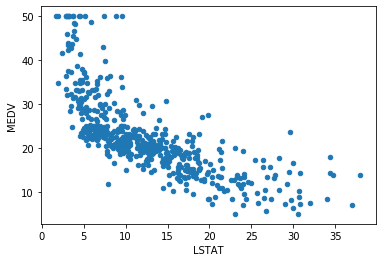

In [31]:
df = pd.DataFrame(data=df_boston_features['LSTAT'], columns=['LSTAT'])
df['MEDV'] = df_boston_target['MEDV']
df.plot.scatter(x='LSTAT',y='MEDV')

#### The relation ship between MEDV and LSTAT does appear to be linear with the exception of some outliers. 

### Question 3: Create and fit() an sklearn.linear_model.LinearRegression model using LSTAT as a predictor of MEDV. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a function of LSTAT?

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(df_boston_features['LSTAT']).reshape([-1,1])
y = np.array(df['MEDV'])

lm = LinearRegression().fit(x,y)

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0]}')

w0 = 34.55384087938311
w1 = -0.9500493537579909


#### MEDV = 34.5538 -0.95LSTAT

### Question 4: Use the predict() method of the model to find the response for each value of the LSTAT attribute in the dataset. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the model.

In [33]:
from sklearn.metrics import mean_squared_error

predicted_medv = lm.predict(x)
mse = mean_squared_error(x, predicted_medv, squared=False)
print('Reduced mean square loss: ', mse)

Reduced mean square loss:  17.06292694852611


### Question 5: Add a line to your scatter plot representing the least squares fit to the data. How well does the model fit the data?

Text(0, 0.5, 'MEDV')

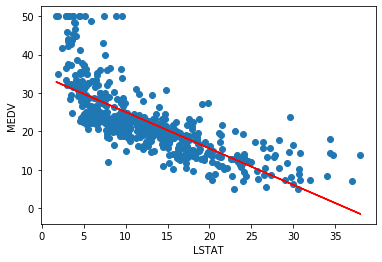

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x,predicted_medv, color='red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

#### The model fits the data well, with the exception with lower LSTAT values. 

### Question 6: Now repeat experiments (3) and (4) using all 13 input features. How does the average loss change?

In [35]:
for feature in df_boston_features:
    print(feature)
    x = np.array(df_boston_features[feature]).reshape([-1,1])
    y = np.array(df['MEDV'])

    lm = LinearRegression().fit(x,y)

    print(f'w0 = {lm.intercept_}')
    print(f'w1 = {lm.coef_[0]}')
    predicted_medv = lm.predict(x)
    rmse = mean_squared_error(x, predicted_medv, squared=False)
    print('Reduced mean square error: ', rmse, '\n')

CRIM
w0 = 24.03310617412388
w1 = -0.4151902779150906
Reduced mean square error:  22.49053221359474 

ZN
w0 = 20.917579117799832
w1 = 0.1421399941553544
Reduced mean square error:  22.896622020566163 

INDUS
w0 = 29.75489651192849
w1 = -0.648490053615715
Reduced mean square error:  16.0472807929893 

CHAS
w0 = 22.093842887473464
w1 = 6.346157112526539
Reduced mean square error:  22.504559215532918 

NOX
w0 = 41.34587446797325
w1 = -33.91605500866111
Reduced mean square error:  22.34670151236455 

RM
w0 = -34.67062077643857
w1 = 9.102108981180312
Reduced mean square error:  17.214693136508902 

AGE
w0 = 30.97867776261804
w1 = -0.1231627212356797
Reduced mean square error:  55.83417280718952 

DIS
w0 = 18.390088330493388
w1 = 1.091613015841109
Reduced mean square error:  18.73875468086449 

RAD
w0 = 26.382128362272397
w1 = -0.40309539555253093
Reduced mean square error:  17.819416131885543 

TAX
w0 = 32.9706544936663
w1 = -0.02556809948198728
Reduced mean square error:  422.5927598401647 

#### The average loss seems consistent accross all attributes with the exception of B and TAX.  Which have high mean square errors.   

### Question 7: Based on the coef_ attributes of the new model, which features are desirable in a home? Which features detract from its value?

#### ZN, CHAS, RM, DIS, and B are all features that are desirable in homes since the coefficient is greater than 0 (positive).  The rest of the attriubtes/features detract from the houses value since the slope/coeffecient is negative.  

### Question 8: Given the coef_ attributes, find the following for each feature: how much does a one unit increase in that feature change the median value of the home? Give your answer in dollars.

In [36]:
for feature in df_boston_features:
    print(feature)
    x = np.array(df_boston_features[feature]).reshape([-1,1])
    y = np.array(df['MEDV'])

    lm = LinearRegression().fit(x,y)
    print('$', lm.coef_[0]*1000)

CRIM
$ -415.19027791509063
ZN
$ 142.1399941553544
INDUS
$ -648.4900536157149
CHAS
$ 6346.157112526539
NOX
$ -33916.05500866111
RM
$ 9102.108981180312
AGE
$ -123.1627212356797
DIS
$ 1091.613015841109
RAD
$ -403.09539555253093
TAX
$ -25.56809948198728
PTRATIO
$ -2157.175296060966
B
$ 33.59306011501362
LSTAT
$ -950.049353757991


### Question 9: Based on the amount of change in the value of the home, which features don’t seem to be important?

#### Tax and B don't seem to be important for the value of the home. Since one unit increase  in Tax and B change the median value by -25 and 33 dollars respectively.